In [124]:
import numpy as np
import pandas as pd
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

### Link to the original file
- https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?date=20231019&accessType=DOWNLOAD

# Data cleaning and exploration

In [95]:
df = pd.read_csv('../dados/Crime_Data_from_2020_to_Present.csv')

# display all columns
pd.set_option('display.max_columns', None)

df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


In [96]:
print('Rows:\t{}'.format(df.shape[0]))
print('Columns:\t{}'.format(df.shape[1]))
df.dtypes

Rows:	820599
Columns:	28


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [97]:
# remove unnecessary columns for the analysis
column_drop = [
    'DR_NO', 'Date Rptd', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes','Premis Cd',
    'Weapon Used Cd', 'Status Desc', 'Crm Cd 1', 'Status', 'Crm Cd 2', 'Crm Cd 3',
    'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']

df.drop(column_drop, axis = 1, inplace=True)

# display the data with important columns for analysis
df.head(3)

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON
2,02/13/2020 12:00:00 AM,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN


In [98]:
# Percentage of missing values.in each column
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]

Weapon Desc     0.651379
Vict Descent    0.131555
Vict Sex        0.131545
Premis Desc     0.000589
DATE OCC        0.000000
TIME OCC        0.000000
AREA NAME       0.000000
Crm Cd Desc     0.000000
Vict Age        0.000000
dtype: float64

In [99]:
# there is a lot of missing information about 'Weapon Desc' column, so i have to drop it too
df.drop('Weapon Desc', axis = 1, inplace = True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DATE OCC      820599 non-null  object
 1   TIME OCC      820599 non-null  int64 
 2   AREA NAME     820599 non-null  object
 3   Crm Cd Desc   820599 non-null  object
 4   Vict Age      820599 non-null  int64 
 5   Vict Sex      712653 non-null  object
 6   Vict Descent  712645 non-null  object
 7   Premis Desc   820116 non-null  object
dtypes: int64(2), object(6)
memory usage: 50.1+ MB


# Investigate each column

### DATE OCC: Date when the incident occurred.

In [101]:
# extract the date
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.date

# rename to 'Crime_Date'
df = df.rename(columns={'DATE OCC': 'Crime_Date'})

# convert the column to datetime
df['Crime_Date'] = pd.to_datetime(df['Crime_Date'])

### TIME OCC: Time of day when the incident occurred.

In [102]:
# convert to string
df['TIME OCC'] = df['TIME OCC'].astype(str)

# pad zeros to the left
df['TIME OCC'] = df['TIME OCC'].str.zfill(4)

# add a colon to separate hours and minutes
df['TIME OCC'] = df['TIME OCC'].str[:2] + ':' + df['TIME OCC'].str[2:]

# rename to 'Crime_Time'
df = df.rename(columns={'TIME OCC': 'Crime_Time'})

# convert the column to datetime
df['Crime_Time'] = pd.to_datetime(df['Crime_Time'], format='%H:%M')
df['Crime_Time'] = df['Crime_Time'].dt.time

### AREA NAME: Name of the incident area.

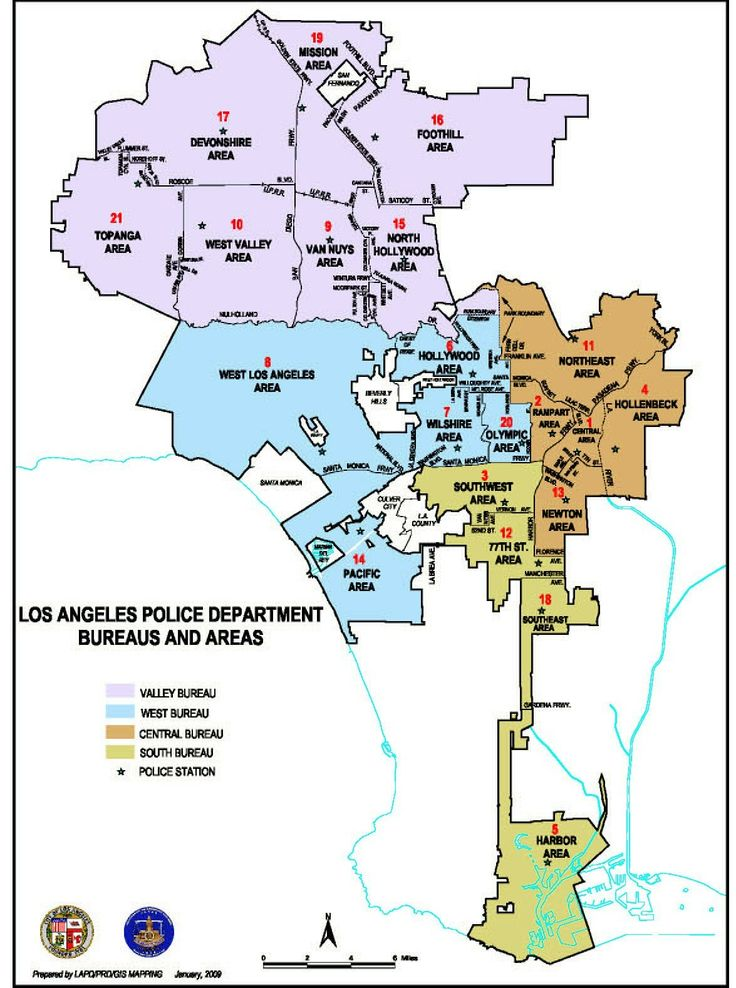

In [125]:
imagem = '../source/areas.jpg'

Image(filename=imagem)

In [103]:
# what unique values we have here?
df['AREA NAME'].value_counts()

AREA NAME
Central        55209
77th Street    51853
Pacific        48003
Southwest      45957
Hollywood      43474
Southeast      41854
Olympic        41435
Newton         41139
N Hollywood    40768
Wilshire       38962
Rampart        38383
West LA        37639
Northeast      35409
Van Nuys       34815
West Valley    34311
Harbor         33967
Topanga        33338
Devonshire     33266
Mission        32660
Hollenbeck     30803
Foothill       27354
Name: count, dtype: int64

In [104]:
# replace the values of 'N Hollywood' to 'North Hollywood'
df['AREA NAME'].replace('N Hollywood', 'North Hollywood', inplace = True)

# rename to 'Area_Name'
df = df.rename(columns={'AREA NAME': 'Area_Name'})

### Crm Cd Desc: Description of the crime code.

In [105]:
# we just want to rename this column to 'Crime_Description'
df = df.rename(columns={'Crm Cd Desc': 'Crime_Description'})

### Vict Age, Vict Sex, Vict Descent: Victim demographics.

#### Vict Age

In [106]:
# basic stats about the column
df['Vict Age'].describe()

count    820599.000000
mean         29.806031
std          21.776511
min          -3.000000
25%           7.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

In [107]:
# shape of values under or equal 0
df[df['Vict Age'] <= 0].shape

(202597, 8)

In [108]:
# store a value in a variable
under_equal_zero = df[df['Vict Age'] <= 0].shape[0]

In [109]:
# what are the mean of ages above 0?
df[df['Vict Age'] > 0]['Vict Age'].mean()

39.57735411859509

In [110]:
# range of values near the mean
fixed_values = [40, 35, 45, 30]

# generate random indices for filling values
random_indices = np.random.choice(len(fixed_values), size=under_equal_zero)

# impute the values with random selection of out fixed values
df.loc[df['Vict Age'] <= 0, 'Vict Age'] = np.array(fixed_values)[random_indices]

In [111]:
# delete this since it maybe outlier (just one record that have 120 years old with some missing information)
df = df[df['Vict Age'] < 110]

# we want to rename this column to 'Victim_Age'
df = df.rename(columns={'Vict Age': 'Victim_Age'})

# basic stats about the column to see what changed
df['Victim_Age'].describe()

count    820598.000000
mean         39.065656
std          13.837043
min           2.000000
25%          30.000000
50%          37.000000
75%          45.000000
max          99.000000
Name: Victim_Age, dtype: float64

In [112]:
# new derived column segments the ages into groups
groups = [
    (df['Victim_Age'] <= 12),
    (df['Victim_Age'] >= 13) & (df['Victim_Age'] < 18),
    (df['Victim_Age'] >= 18) & (df['Victim_Age'] < 65),
    (df['Victim_Age'] >= 65)
]

labels = ['Child', 'Teen', 'Adult', 'Old']

# create new column 'Age_Group'
df['Age_Group'] = np.select(groups, labels)

In [113]:
# change the position orf the new column
move = df.pop('Age_Group')
df.insert(8, 'Age_Group', move)

#### Vict Sex

In [114]:
# what unique values we have here?
df['Vict Sex'].value_counts()

Vict Sex
M    338824
F    302250
X     71488
H        90
-         1
Name: count, dtype: int64

In [115]:
# replace values with the full gender name and add 'H' vales to Unknown label
df['Vict Sex'].replace({'M':'Male', 'F':'Female', 'X':'Unknown', 'H':'Unknown'}, inplace = True)

# fill null values with 'Unknown'
df['Vict Sex'].fillna('Unknown', inplace=True)

# we want to rename this column to 'Victim_Sex'
df = df.rename(columns={'Vict Sex': 'Victim_Sex'})

#### Vict Descent

In [116]:
# what unique values we have here?
df['Vict Descent'].value_counts()

Vict Descent
H    251794
W    167251
B    116969
X     78989
O     64994
A     17959
K      4369
F      3408
C      3141
J      1140
V       846
I       771
Z       412
P       219
U       167
D        61
G        58
L        50
S        45
-         2
Name: count, dtype: int64

In [117]:
# replace values with its corresponding label
descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean', 
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    '-': 'Unknown',
    'Z': 'Asian Indian'
}

df['Vict Descent'].replace(descent_mapping, inplace = True)

# fill null values with 'Unknown'
df['Vict Descent'].fillna('Unknown', inplace=True)

# we want to rename this column to 'Victim_Descent'
df = df.rename(columns={'Vict Descent': 'Victim_Descent'})

### Premis Desc: Description of the incident location.
The type of structure, vehicle, or location where the crime took place.

In [118]:
# fill null values with 'Unknown'
df['Premis Desc'].fillna('Unknown', inplace=True)

# we want to rename this column to 'Crime_Location'
df = df.rename(columns={'Premis Desc': 'Crime_Location'})

# Data validation

In [119]:
# display sample recordrs
df.head(3)

,Crime_Date,Crime_Time,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Crime_Location,Age_Group
0,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,Female,Black,SINGLE FAMILY DWELLING,Adult
1,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,Male,Hispanic/Latin/Mexican,SIDEWALK,Adult
2,2020-02-13,12:00:00,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,45,Unknown,Unknown,POLICE FACILITY,Adult


In [120]:
# datatypes
df.dtypes

Crime_Date           datetime64[ns]
Crime_Time                   object
Area_Name                    object
Crime_Description            object
Victim_Age                    int64
Victim_Sex                   object
Victim_Descent               object
Crime_Location               object
Age_Group                    object
dtype: object

In [121]:
# Percentage of missing values.in each column
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]

Crime_Date           0.0
Crime_Time           0.0
Area_Name            0.0
Crime_Description    0.0
Victim_Age           0.0
Victim_Sex           0.0
Victim_Descent       0.0
Crime_Location       0.0
Age_Group            0.0
dtype: float64

In [122]:
# Salvar as 5 primeiras linhas em um arquivo CSV
# df.head(5).to_csv('../dados/la_reports.csv', index=False)

In [123]:
df.to_csv('../dados/LA_Reports.csv', index=False)